In [4]:
import pandas as pd
import numpy as np
%pylab inline 

import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

Populating the interactive namespace from numpy and matplotlib


### Display points below are bubble locations. Can be tweaked for cosmetic purposes.

In [9]:
displayPoints = {'British Columbia':[-123.94050141,   52.72872135],
'Quebec':[-71.94113447,  53.11090014],
'Nunavut':[-93.5175253 ,  64.82974335],
'Prince Edward Island':[-63.39405071,  48.43339508],
'Saskatchewan':[-106.38625843,   51.21414373],
'Yukon':[-135.43293066,   62.08469335],
'Manitoba':[-97.83934881,  56.55191593],
'Ontario':[-84.60617656,  50.07018605],
'New Brunswick':[-69.6499075,   44.28717142],
'Northwest Territories':[-121.48501127,   65.25301626],
'Alberta':[-115.74015842 ,  56.23383086],
'Newfoundland and Labrador':[-58.73108752,  55.41404249],
'Nova Scotia':[-57.30687173,  44.87194801] }

### Data below used for demonstration purposes

In [2]:
dummyData = {'Alberta': 0.84,
 'British Columbia': 2.11,
 'Manitoba': 1.51,
 'New Brunswick': 0.49,
 'Newfoundland and Labrador': 0.22,
 'Northwest Territories': 0.49,
 'Nova Scotia': 0.61,
 'Nunavut': 0.0,
 'Ontario': 1.89,
 'Prince Edward Island': 0.81,
 'Quebec': 1.01,
 'Saskatchewan': 0.27,
 'Yukon': 0.0}

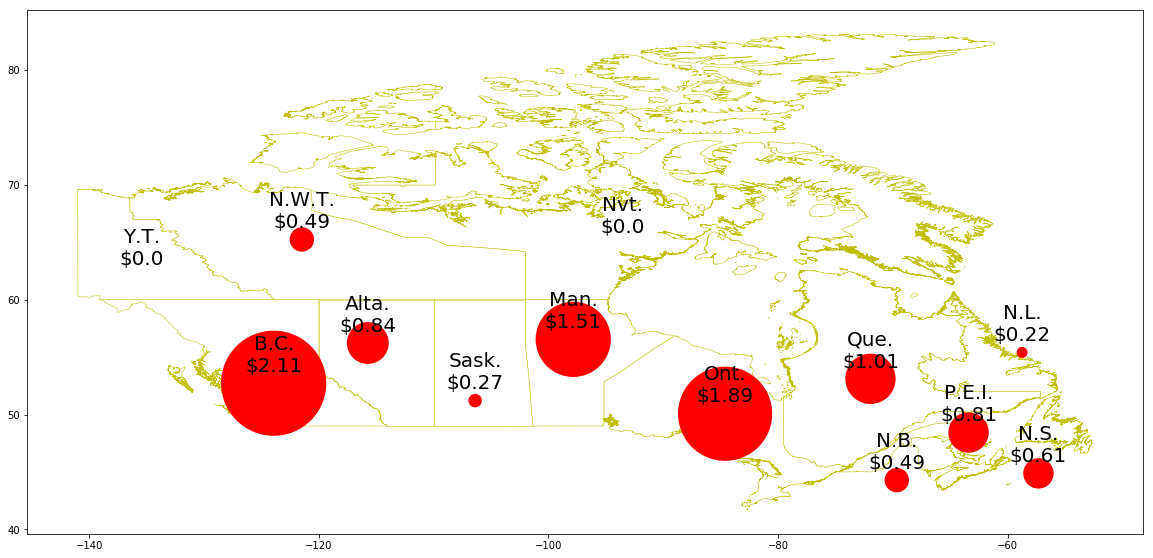

In [11]:
values = raisedPerCapita

sf = shapefile.Reader("shapefile/gpr_000b11a_e.shp")
recs    = sf.records()
shapes  = sf.shapes()
Nshp    = len(shapes)
cns     = []
for nshp in xrange(Nshp):
    cns.append(recs[nshp][1])
cns = array(cns)
cm    = get_cmap('Dark2')
cccol = cm(1.*arange(Nshp)/Nshp)
#   -- plot --
fig     = plt.figure(figsize=(20,15))
ax      = fig.add_subplot(111)

cmap = matplotlib.cm.get_cmap('seismic')
norm = matplotlib.colors.Normalize(min(values.values()), max(values.values()))
color_producer = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

# Change the province name passed as you iterate through provinces.
#rgba = color_producer.to_rgba(values['Manitoba'])
#PatchCollection(ptchs, facecolor=rgba, edgecolor='k', linewidths=.5)

maxVal = 2.2 #maxVal = values.values.max
maxCircleWidth = 15.0

for nshp in xrange(Nshp):
    ptchs   = []
    pts     = array(shapes[nshp].points)
    
    ptsNParray = np.array(pts)
    #centroid = np.mean(ptsNParray, axis=0)
    centroid=displayPoints[recs[nshp][2]]
    #print(centroid)
    ax.text(centroid[0], centroid[1]+1.0, recs[nshp][4]+"\n$"+str(values[recs[nshp][2]]), ha='center', size=20)
    
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
    for pij in xrange(len(prt)):
     ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    
    # colouring provinces
    #rgba = color_producer.to_rgba(values[recs[nshp][2]])
    ax.add_collection(PatchCollection(ptchs,facecolor='white',edgecolor='y', linewidths=.5)) 
    
    circleWidth = ((values[recs[nshp][2]]/maxVal) / 3.14)*maxCircleWidth
    circle = plt.Circle((centroid[0], centroid[1]), circleWidth, fc='r')
    plt.gca().add_patch(circle)
    
    
    #print(circleWidth)
    #print(recs[nshp])
    
ax.set_xlim(-160,-40)   # (-160,-40)
ax.set_ylim(40,90)  

color_producer.set_array(values.values)
#plt.colorbar(color_producer)

#ax.text(-97, 55, "hello", ha='center', size=20)
ax.add_image

plt.axis('scaled')
plt.show()